<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gene-essentiality" data-toc-modified-id="Gene-essentiality-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gene essentiality</a></span><ul class="toc-item"><li><span><a href="#Knocking-out-a-single-gene" data-toc-modified-id="Knocking-out-a-single-gene-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Knocking out a single gene</a></span></li><li><span><a href="#Perform-all-possible-single-gene-deletions" data-toc-modified-id="Perform-all-possible-single-gene-deletions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Perform all possible single gene deletions</a></span></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exercises</a></span></li><li><span><a href="#Gene-essentiality-with-respect-to-each-biomass-precursor" data-toc-modified-id="Gene-essentiality-with-respect-to-each-biomass-precursor-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Gene essentiality with respect to each biomass precursor</a></span></li></ul></li></ul></div>

# Gene essentiality

In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pandas import DataFrame
import pandas as pd
from cobra.io import read_sbml_model
%matplotlib inline
model = read_sbml_model('data/e_coli_core.xml.gz')

## Knocking out a single gene

In the model, exactly one gene is associated with reaction with [phosphoglycerate kinase](http://bigg.ucsd.edu/universal/reactions/PGK) (PGK).

In [11]:
model.reactions.PGK.genes

frozenset({<Gene b2926 at 0x1316f6278>})

Checking the name of this gene in the model (the id is the Blattner number b2926), reveals that it is indeed [pgk](http://ecocyc.org/gene?orgid=ECOLI&id=EG10703).

In [12]:
model.genes.b2926.name

'pgk'

Is [pgk](http://ecocyc.org/gene?orgid=ECOLI&id=EG10703) essential? Let's find out.

In [13]:
with model as pgk_mutant:
    pgk_mutant.genes.b2926.knock_out()
    print(pgk_mutant.slim_optimize())

0.0


Yes, it is.

## Perform all possible single gene deletions

Using a `for` loop allows to iterate over all genes in the model and knock out each one of them individually. We're using the model as a context to undo every gene deletion before proceeding to the next knockout.

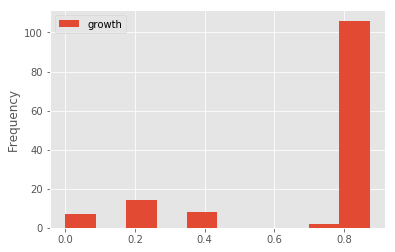

In [14]:
essentiality = {}
for gene in model.genes:
    with model:
        gene.knock_out()
        essentiality[gene] = model.slim_optimize(error_value=0.)

df = DataFrame.from_dict(essentiality, orient='index')
df = df.rename(columns={0: 'growth'})
df = df.sort_values('growth')

df.plot.hist()

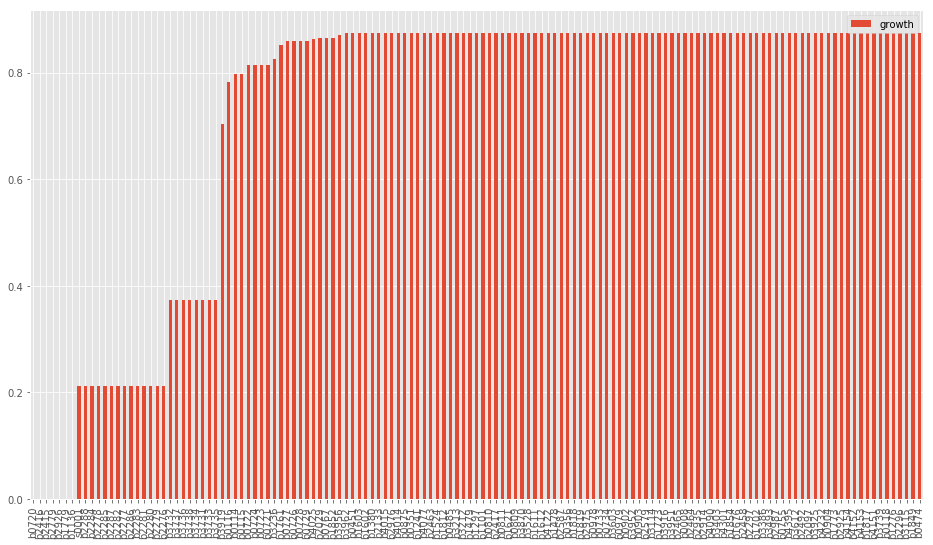

In [15]:
ax = df.plot.bar().axes
ax.figure.set_size_inches(16, 9)

## Exercises

1. How many genes are in each category (essential and non-essential)? How many non-essential genes show a reduced growth rate?
2. Determine the essentialiy of genes for all other available carbon sources (if this is too complicated, determine the essentiality profile for one other carbon source).

Hints:
* Sometimes an optimal solution cannot be found for certain knockouts (an exception is raised). Use `try` and `except` to catch infeasible solutions.

In [ ]:
carbon_exchanges = ['EX_ac_e', 'EX_etoh_e', 'EX_for_e',
                    'EX_fru_e', 'EX_fum_e', 'EX_glc__D_e',
                    'EX_lac__D_e', 'EX_mal__L_e', 'EX_pyr_e', 'EX_succ_e']

## Gene essentiality with respect to each biomass precursor

In [16]:
biomass_precursors = model.reactions.BIOMASS_Ecoli_core_w_GAM.reactants
len(biomass_precursors)

16

In [17]:
precursor_production = pd.DataFrame(columns=['knocked_gene', 'precursor', 'max_production'])
index = 0
for precursor in biomass_precursors:
    print('Determining essentiality profile for precursor: ' + precursor.id)
    with model:
        model.objective = model.add_boundary(precursor, type='demand')
        for gene in model.genes:
            with model:
                gene.knock_out()
                precursor_production.loc[index] = gene.name, precursor.id, model.slim_optimize(error_value=0.)
                index += 1

Determining essentiality profile for precursor: 3pg_c
Determining essentiality profile for precursor: accoa_c
Determining essentiality profile for precursor: atp_c
Determining essentiality profile for precursor: e4p_c
Determining essentiality profile for precursor: f6p_c
Determining essentiality profile for precursor: g3p_c
Determining essentiality profile for precursor: g6p_c
Determining essentiality profile for precursor: gln__L_c
Determining essentiality profile for precursor: glu__L_c
Determining essentiality profile for precursor: h2o_c
Determining essentiality profile for precursor: nad_c
Determining essentiality profile for precursor: nadph_c
Determining essentiality profile for precursor: oaa_c
Determining essentiality profile for precursor: pep_c
Determining essentiality profile for precursor: pyr_c
Determining essentiality profile for precursor: r5p_c


In [18]:
precursor_production['can_produce'] = precursor_production['max_production'].apply(lambda x: 0 if x < 0.05 else 1)

precursor_production

,knocked_gene,precursor,max_production,can_produce
0,mhpF,3pg_c,19.623333,1
1,adhE,3pg_c,19.623333,1
2,s0001,3pg_c,8.493333,1
3,purT,3pg_c,19.623333,1
4,tdcD,3pg_c,19.623333,1
5,ackA,3pg_c,19.623333,1
6,acnA,3pg_c,19.623333,1
7,acnB,3pg_c,19.623333,1
8,adk,3pg_c,15.000000,1
9,lpd,3pg_c,19.497778,1


In [19]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

df = precursor_production.pivot(index='precursor', columns='knocked_gene', values='can_produce')
data = [go.Heatmap(z=df.values.tolist())]
layout = go.Layout(xaxis=dict(title='knocked genes'), yaxis=dict(title='precursor'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)